In [1]:
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

import os
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def avg_images(class_name, dataset='Training'):
    path = f'../Images/{dataset}/{class_name}/'
    image_files = os.listdir(path)
    num_images = len(image_files)
    average_image = np.zeros((256, 256, 1), dtype=np.float32)

    for image_file in image_files:
        image_path = os.path.join(path, image_file)
        image = load_img(image_path, color_mode='grayscale', target_size=(256, 256))
        image_array = img_to_array(image)
        average_image += image_array / num_images

    return average_image

In [3]:
def find_closest_class(mean_pixel_value):
    closest_class = None
    closest_distance = float('inf')

    # Compare the mean pixel value with the average pixel values of each class
    for class_name, average in class_averages.items():
        distance = np.linalg.norm(mean_pixel_value - average)
        if distance < closest_distance:
            closest_distance = distance
            closest_class = class_name

    return closest_class

In [4]:
# Define the paths to the training images for each class
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
class_paths = {class_name: f'../Images/Training/{class_name}/' for class_name in class_names}

# Calculate the average pixel value for each class
class_averages = {}
for class_name, class_path in class_paths.items():
    average_image = avg_images(class_name)
    class_averages[class_name] = np.mean(average_image)

In [ ]:

accuracy = correct_classifications / total_images * 100

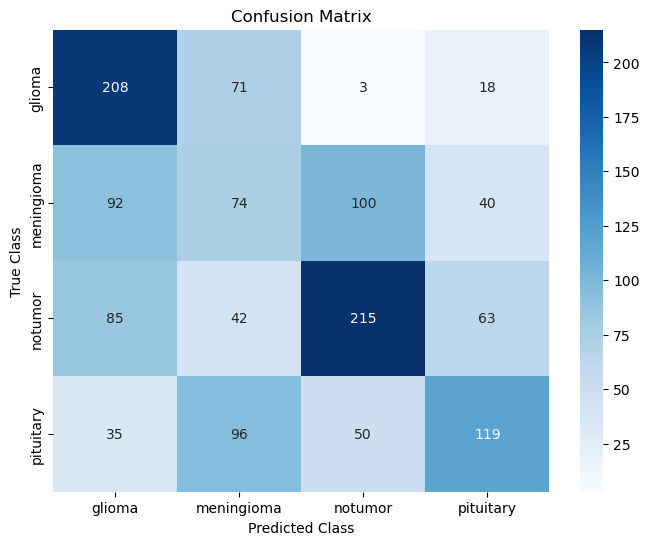

           Accuracy  Precision   Recall  F1 Score
baseline  46.987033   0.468308  0.46987  0.463567


In [11]:
# Path to the test image folder
test_folder_path = '../Images/Testing/'

# Load and classify each test image
actual_classes = []
predicted_classes = []
correct_classifications = 0
total_images = 0
for class_name, class_path in class_paths.items():
    class_folder_path = os.path.join(test_folder_path, class_name)
    image_files = os.listdir(class_folder_path)

    for image_file in image_files:
        image_path = os.path.join(class_folder_path, image_file)
        test_image = cv2.imread(image_path)
        mean_pixel_value = np.mean(test_image, axis=(0, 1))

        # Find the closest class for the test image
        closest_class = find_closest_class(mean_pixel_value)

        actual_classes.append(class_name)
        predicted_classes.append(closest_class)
        # Check if the closest class matches the actual class
        if closest_class == class_name:
            correct_classifications += 1
        
        total_images += 1

# Create confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes, labels=list(class_paths.keys()))

# Calculate precision, recall, and F1 score
precision = precision_score(actual_classes, predicted_classes, average='weighted')
recall = recall_score(actual_classes, predicted_classes, average='weighted')
f1 = f1_score(actual_classes, predicted_classes, average='weighted')
accuracy = correct_classifications / total_images * 100
# Create a DataFrame for metrics
data = {'Accuracy':[accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1]}
metrics_df = pd.DataFrame(data, index=['baseline'])

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=list(class_paths.keys()), yticklabels=list(class_paths.keys()))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Display the metrics DataFrame
print(metrics_df)